# ML Assigment 1
white wine



In [1]:
%matplotlib inline
import matplotlib.pyplot as mpl
import pandas as pd
import numpy as np
import scipy as scp
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Load Data
tot = pd.read_csv("winequality-white.csv", sep=";")
training = pd.read_csv("training.csv", sep=";")
test = pd.read_csv("test.csv", sep = ";")
tot.isnull().values.any()

False

In [3]:
training

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3913,7.2,0.250,0.32,1.5,0.054,24.0,105.0,0.99154,3.17,0.48,11.1,6
3914,6.2,0.390,0.24,4.8,0.037,45.0,138.0,0.99174,3.23,0.43,11.2,7
3915,4.7,0.455,0.18,1.9,0.036,33.0,106.0,0.98746,3.21,0.83,14.0,7
3916,7.1,0.370,0.30,6.2,0.040,49.0,139.0,0.99021,3.17,0.27,13.6,6


In [4]:
# Extract features (X) and target variable (y) from the training data
X_train = training.drop("quality", axis=1) 
y_train = training["quality"]

In [5]:
# Extract features (X) from the test data
X_test = test.drop("quality", axis=1) 

In [6]:
# Make sure the columns in X_train and X_test are the same and in the same order
assert all(X_train.columns == X_test.columns), "Columns in training and test data must be the same."

In [7]:
# Perform scaling on the data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [8]:
# Transform the features for both training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Define classifiers
random_forest_classifier = RandomForestClassifier()
k_neighbors_classifier = KNeighborsClassifier()

In [10]:
# Define the Repeated k-Fold Cross-Validation parameters
n_splits = 3
n_repeats = 10
cv = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

In [11]:
# Perform cross-validation 
random_forest_scores = cross_val_score(random_forest_classifier, X_train_scaled, y_train, cv=cv, scoring='accuracy')
k_neighbors_scores = cross_val_score(k_neighbors_classifier, X_train_scaled, y_train, cv=cv, scoring='accuracy')

In [12]:
# Display the mean accuracy and standard deviation for each classifier
print(f"Random Forest Classifier - Mean Accuracy: {np.mean(random_forest_scores):.4f}, Std Dev: {np.std(random_forest_scores):.4f}")
print(f"KNeighbors Classifier - Mean Accuracy: {np.mean(k_neighbors_scores):.4f}, Std Dev: {np.std(k_neighbors_scores):.4f}")

Random Forest Classifier - Mean Accuracy: 0.6545, Std Dev: 0.0154
KNeighbors Classifier - Mean Accuracy: 0.5231, Std Dev: 0.0108


In [13]:
# Initialize the Random Forest Classifier
final_model = RandomForestClassifier()

In [14]:
# Fit the final model on the entire training set
final_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [15]:
# Quality is the target variable in test set
y_test = test["quality"]

In [16]:
# Scale the test set using the same scaler
X_test_scaled = scaler.transform(X_test)

In [17]:
# Make predictions on the test set
y_pred = final_model.predict(X_test_scaled)

In [18]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

C:\Users\annan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\annan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\annan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1471: Unde

Test Set Accuracy: 0.5520


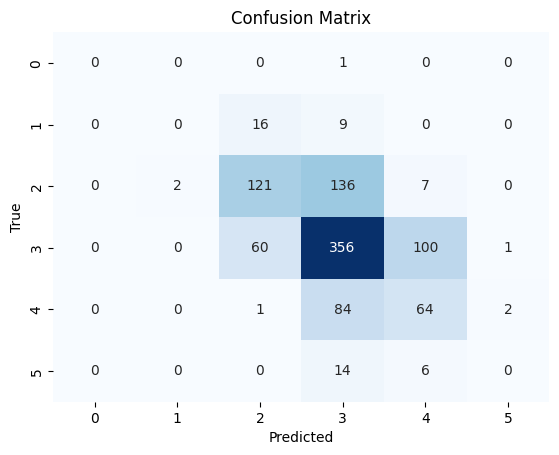


Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        25
           5       0.61      0.45      0.52       266
           6       0.59      0.69      0.64       517
           7       0.36      0.42      0.39       151
           8       0.00      0.00      0.00        20

    accuracy                           0.55       980
   macro avg       0.26      0.26      0.26       980
weighted avg       0.53      0.55      0.54       980



In [19]:
# Print the results
print(f"Test Set Accuracy: {accuracy:.4f}")

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(classification_rep)

In [20]:

# step 8:
from imblearn.under_sampling import RandomUnderSampler

# Check the ratio of the classes before balancing
print("Class distribution before balancing:")
print(y_train.value_counts())

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Fit and transform the training set to balance classes
X_train_balanced, y_train_balanced = rus.fit_resample(X_train_scaled, y_train)

# Check the ratio of the classes after balancing
print("\nClass distribution after balancing:")
print(pd.Series(y_train_balanced).value_counts())

Class distribution before balancing:
6    1681
5    1191
7     729
8     155
4     138
3      19
9       5
Name: quality, dtype: int64

Class distribution after balancing:
3    5
4    5
5    5
6    5
7    5
8    5
9    5
Name: quality, dtype: int64


Random Forest Classifier on Balanced Training Set - Mean Accuracy: 0.1710, Std Dev: 0.0811
KNeighbors Classifier on Balanced Training Set - Mean Accuracy: 0.2778, Std Dev: 0.1003



C:\Users\annan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\annan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\annan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarni

Test Set Accuracy with Balanced Training Set: 0.1235


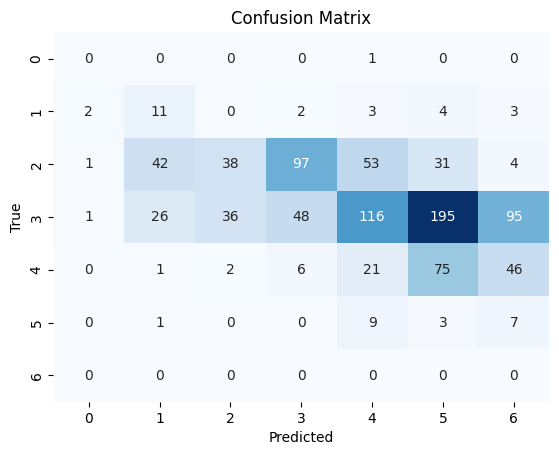


Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.14      0.44      0.21        25
           5       0.50      0.14      0.22       266
           6       0.31      0.09      0.14       517
           7       0.10      0.14      0.12       151
           8       0.01      0.15      0.02        20
           9       0.00      0.00      0.00         0

    accuracy                           0.12       980
   macro avg       0.15      0.14      0.10       980
weighted avg       0.32      0.12      0.16       980



In [21]:
# Perform cross-validation on balanced training set
random_forest_scores_balanced = cross_val_score(random_forest_classifier, X_train_balanced, y_train_balanced, cv=cv, scoring='accuracy')
k_neighbors_scores_balanced = cross_val_score(k_neighbors_classifier, X_train_balanced, y_train_balanced, cv=cv, scoring='accuracy')

# Display the mean accuracy and standard deviation for each classifier on balanced training set
print(f"Random Forest Classifier on Balanced Training Set - Mean Accuracy: {np.mean(random_forest_scores_balanced):.4f}, Std Dev: {np.std(random_forest_scores_balanced):.4f}")
print(f"KNeighbors Classifier on Balanced Training Set - Mean Accuracy: {np.mean(k_neighbors_scores_balanced):.4f}, Std Dev: {np.std(k_neighbors_scores_balanced):.4f}\n")

# Initialize the Random Forest Classifier
final_model_balanced = RandomForestClassifier()

# Fit the final model on the entire balanced training set
final_model_balanced.fit(X_train_balanced, y_train_balanced)

# Quality is the target variable
y_test = test["quality"]

# Scale the test set using the same scaler
X_test_scaled = scaler.transform(X_test)

# Make predictions on the test set
y_pred_balanced = final_model_balanced.predict(X_test_scaled)

# Evaluate performance on the test set
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)
classification_rep_balanced = classification_report(y_test, y_pred_balanced)

# Print the results on the test set
print(f"Test Set Accuracy with Balanced Training Set: {accuracy_balanced:.4f}")
# Plot confusion matrix
sns.heatmap(conf_matrix_balanced, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(classification_rep_balanced)